# Importing Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FVProject/archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3115 files belonging to 36 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FVProject/archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


# Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

# Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) #Output Layer

# Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 681s 7s/step - accuracy: 0.0210 - loss: 18.0286 - val_accuracy: 0.0318 - val_loss: 3.5823
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.0321 - loss: 3.5826 - val_accuracy: 0.0337 - val_loss: 3.5799
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.0376 - loss: 3.5757 - val_accuracy: 0.0488 - val_loss: 3.5706
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.0542 - loss: 3.5410 - val_accuracy: 0.0854 - val_loss: 3.3702
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.0662 - loss: 3.4073 - val_accuracy: 0.1127 - val_loss: 3.2455
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.0822 - loss: 3.2632 - val_accuracy: 0.1628 - val_loss: 2.9927
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.1177 - loss: 3.1203 - val_accuracy: 0.2212 - val_loss: 2.8331
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.1349 - loss: 3.0198 - val_accuracy: 0.2350 - 

# Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 846ms/step - accuracy: 0.8553 - loss: 0.5586
Training accuracy: 0.8584269881248474


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 910ms/step - accuracy: 0.8508 - loss: 0.5858
Validation accuracy: 0.8584269881248474


# Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.024077046662569046,
  0.034349918365478516,
  0.03402889147400856,
  0.05906902253627777,
  0.06805778294801712,
  0.09309791028499603,
  0.12295345216989517,
  0.14414125680923462,
  0.19357945024967194,
  0.2044943869113922,
  0.25810593366622925,
  0.29598715901374817,
  0.33547350764274597,
  0.3820224702358246,
  0.4215088188648224,
  0.454253613948822,
  0.4895666241645813,
  0.5280898809432983,
  0.545746386051178,
  0.5595505833625793,
  0.579454243183136,
  0.6138041615486145,
  0.6295344829559326,
  0.643338680267334,
  0.6645264625549316,
  0.6715890765190125,
  0.6902086734771729,
  0.6792937517166138,
  0.7191011309623718,
  0.7287319302558899,
  0.7537720799446106,
  0.7640449404716492],
 'loss': [7.1949462890625,
  3.582249402999878,
  3.5764095783233643,
  3.502244472503662,
  3.3667874336242676,
  3.2274422645568848,
  3.089277982711792,
  2.9878127574920654,
  2.8266496658325195,
  2.8008170127868652,
  2.5762522220611572,
  2.459043264389038,
  2.2811

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 85.84269881248474 %


# Accuracy Visualization

## Training Visualization

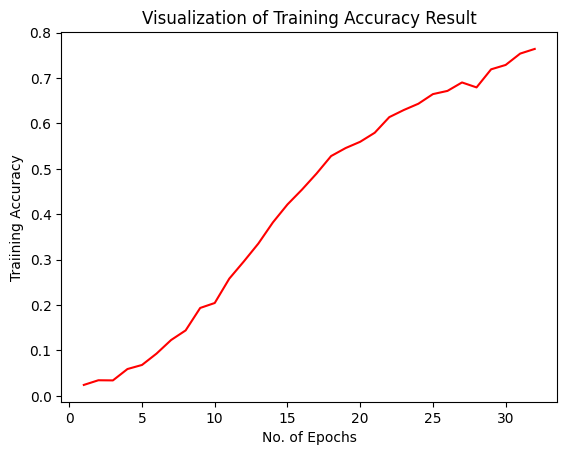

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

## Validation Accuracy

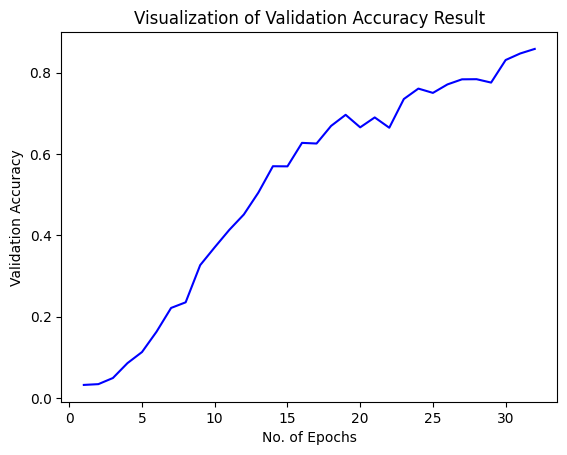

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FVProject/archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 69s 6s/step - accuracy: 0.8888 - loss: 0.5474
Test accuracy: 0.8802228569984436
